<a href="https://colab.research.google.com/github/WillKWL/Project-NBASeason/blob/master/2_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [243]:
# remove library not used
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
pd.set_option("display.max_rows", 10)
pd.set_option("display.max_columns", None)
plt.rcParams["figure.figsize"] = [20, 5]
import seaborn as sns
from scipy.stats import zscore
from matplotlib.patches import Rectangle
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import QuantileTransformer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA 
from google.colab import drive
import os
from google.colab import files

In [2]:
# def warn(*args, **kwargs):
#     pass
# import warnings
# warnings.warn = warn

# Read train set

In [3]:
train_set = pd.read_pickle("https://github.com/WillKWL/PublicData/blob/main/raw/nba_season_vs_playoff_train.pkl?raw=true")
train_set

,TEAM_ID,TEAM_NAME,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,CFID,CFPARAMS,OPP_FGM,OPP_FGA,OPP_FG_PCT,OPP_FG3M,OPP_FG3A,OPP_FG3_PCT,OPP_FTM,OPP_FTA,OPP_FT_PCT,OPP_OREB,OPP_DREB,OPP_REB,OPP_AST,OPP_TOV,OPP_STL,OPP_BLK,OPP_BLKA,OPP_PF,OPP_PFD,OPP_PTS,PLAYOFF_RANKING,SEASON,UNIQUE_ID
0,1610612741,Chicago Bulls,82,69,13,0.841,52.5,43.6,92.0,0.473,7.0,18.7,0.373,18.4,24.6,0.747,16.4,32.7,49.1,28.5,14.7,9.5,4.4,3.8,21.5,0.2,112.4,11.8,10,Chicago Bulls,38.5,88.4,0.436,6.3,18.7,0.335,17.3,23.5,0.737,14.5,29.3,43.8,21.5,17.2,8.3,3.8,4.4,23.0,21.5,100.7,1,1996-97,1610612741199697
1,1610612737,Atlanta Hawks,82,56,26,0.683,54.2,38.5,86.3,0.446,9.0,25.1,0.360,20.4,26.8,0.763,14.0,32.2,46.2,21.3,16.8,9.6,5.8,4.5,21.8,0.1,106.4,6.1,10,Atlanta Hawks,38.4,88.3,0.435,6.6,19.2,0.347,16.9,22.9,0.737,14.3,30.4,44.8,22.8,17.3,8.3,4.5,5.8,23.9,21.8,100.3,0,1996-97,1610612737199697
2,1610612750,Minnesota Timberwolves,82,40,42,0.488,52.1,38.7,84.8,0.456,4.9,14.4,0.339,21.6,28.7,0.751,12.6,30.3,42.9,24.7,16.4,8.1,7.3,5.9,24.0,0.2,103.9,-1.6,10,Minnesota Timberwolves,38.8,86.2,0.450,6.2,17.0,0.362,21.7,28.8,0.754,14.1,31.1,45.2,23.5,16.9,8.6,5.9,7.3,24.1,24.0,105.5,0,1996-97,1610612750199697
4,1610612762,Utah Jazz,82,64,18,0.780,52.7,41.6,82.7,0.504,4.4,12.0,0.370,24.7,32.1,0.769,11.8,32.0,43.9,29.2,16.7,9.9,5.6,5.0,26.3,0.2,112.4,9.6,10,Utah Jazz,36.0,82.3,0.438,6.9,19.7,0.352,23.9,31.8,0.750,12.7,27.9,40.7,21.2,17.7,8.5,5.0,5.6,27.2,26.3,102.8,0,1996-97,1610612762199697
5,1610612761,Toronto Raptors,82,30,52,0.366,52.1,38.1,87.2,0.437,7.7,21.3,0.363,19.0,26.4,0.720,14.9,29.6,44.5,22.5,17.7,9.5,6.8,5.8,24.8,0.1,102.9,-3.4,10,Toronto Raptors,39.1,84.0,0.465,6.5,18.8,0.348,21.6,29.9,0.724,13.6,30.9,44.5,25.9,17.6,8.9,5.8,6.8,23.6,24.8,106.3,0,1996-97,1610612761199697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766,1610612742,Dallas Mavericks,82,52,30,0.634,50.2,40.9,88.7,0.461,13.6,38.9,0.350,17.0,22.1,0.771,9.6,35.2,44.8,24.4,13.0,7.0,4.1,3.8,20.5,20.9,112.5,3.4,10,Dallas Mavericks,40.6,88.9,0.457,11.4,33.5,0.340,16.5,21.5,0.767,9.9,35.6,45.5,24.5,13.6,7.3,3.8,4.1,20.9,20.5,109.1,0,2021-22,1610612742202122
767,1610612739,Cleveland Cavaliers,82,44,38,0.537,49.5,40.9,87.1,0.469,12.0,33.7,0.355,17.3,22.7,0.760,10.5,35.0,45.5,25.9,14.8,7.3,4.3,4.8,18.0,20.6,111.0,2.2,10,Cleveland Cavaliers,40.6,89.8,0.452,12.1,34.2,0.353,15.5,20.0,0.774,10.8,33.4,44.1,24.8,13.8,8.7,4.8,4.3,20.6,18.0,108.8,0,2021-22,1610612739202122
768,1610612741,Chicago Bulls,82,46,36,0.561,48.6,42.1,87.7,0.480,10.7,29.1,0.369,17.7,21.7,0.813,8.8,34.0,42.7,24.1,13.0,7.2,4.1,5.0,19.0,18.3,112.7,-0.4,10,Chicago Bulls,41.8,88.3,0.474,11.8,32.3,0.366,17.6,22.1,0.795,9.4,34.2,43.6,25.2,13.2,7.2,5.0,4.1,18.3,19.0,113.0,0,2021-22,1610612741202122
769,1610612766,Charlotte Hornets,82,43,39,0.524,47.8,42.2,90.1,0.468,13.7,37.6,0.365,15.6,21.1,0.740,10.7,33.2,43.9,27.7,13.1,8.5,4.8,4.5,19.6,19.3,113.6,0.4,10,Charlotte Hornets,41.4,88.8,0.466,13.8,38.1,0.362,16.6,21.8,0.763,11.2,35.1,46.3,26.1,14.8,7.4,4.5,4.8,19.3,19.6,113.2,0,2021-22,1610612766202122


# Exploratory data analysis
- dataset set can be split into left and right half
- left half = team stats
- right half = team stats (ranked)
- Y = PLAYOFF_RANKING

In [ ]:
pd.DataFrame(train_set.dtypes).T

,TEAM_ID,TEAM_NAME,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,CFID,CFPARAMS,OPP_FGM,OPP_FGA,OPP_FG_PCT,OPP_FG3M,OPP_FG3A,OPP_FG3_PCT,OPP_FTM,OPP_FTA,OPP_FT_PCT,OPP_OREB,OPP_DREB,OPP_REB,OPP_AST,OPP_TOV,OPP_STL,OPP_BLK,OPP_BLKA,OPP_PF,OPP_PFD,OPP_PTS,PLAYOFF_RANKING,SEASON,UNIQUE_ID
0,object,object,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,category,category,object


In [ ]:
train_set.describe()

,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,OPP_FGM,OPP_FGA,OPP_FG_PCT,OPP_FG3M,OPP_FG3A,OPP_FG3_PCT,OPP_FTM,OPP_FTA,OPP_FT_PCT,OPP_OREB,OPP_DREB,OPP_REB,OPP_AST,OPP_TOV,OPP_STL,OPP_BLK,OPP_BLKA,OPP_PF,OPP_PFD,OPP_PTS
count,617.000000,617.000000,617.000000,617.000000,617.000000,617.00000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000
mean,79.243112,39.291734,39.951378,0.496026,50.939222,39.34295,86.940681,0.452590,7.676013,21.578282,0.353887,19.093355,25.297731,0.755896,11.867585,32.967747,44.835170,23.273258,15.340194,8.073906,5.151053,5.187682,22.208428,14.027877,105.454457,-0.075203,39.372934,86.929498,0.452942,7.658671,21.500810,0.355178,19.125770,25.323177,0.755925,11.858509,32.994327,44.854133,23.310049,15.315883,8.107618,5.187682,5.151053,22.210859,22.208266,105.530794
std,7.231507,12.858842,12.953497,0.155499,1.998738,1.56598,2.095438,0.016397,2.815860,7.553241,0.021219,2.207375,3.088594,0.029930,1.760447,1.752766,1.850486,1.924681,1.425512,0.948144,0.891047,0.751413,2.257684,10.115921,4.390284,4.904257,1.696912,2.087199,0.015962,2.540802,6.886266,0.015414,2.227638,3.082222,0.016660,1.475865,1.723091,1.633364,1.675113,1.437217,0.793126,0.751413,0.891047,2.137709,2.257480,4.268511
min,50.000000,7.000000,9.000000,0.106000,45.500000,34.20000,80.400000,0.401000,2.100000,8.100000,0.264000,12.800000,17.400000,0.668000,7.700000,27.300000,37.800000,17.800000,11.200000,5.700000,2.400000,3.100000,16.800000,0.000000,91.200000,-15.100000,34.400000,79.600000,0.402000,3.700000,11.500000,0.300000,14.200000,18.200000,0.694000,8.300000,27.000000,39.900000,18.100000,11.500000,6.200000,3.100000,2.400000,17.500000,16.800000,93.000000
25%,82.000000,29.000000,30.000000,0.380000,49.500000,38.30000,85.600000,0.442000,5.600000,16.000000,0.341000,17.500000,22.900000,0.739000,10.600000,31.800000,43.600000,21.900000,14.300000,7.500000,4.500000,4.700000,20.500000,0.200000,102.700000,-3.400000,38.300000,85.700000,0.442000,5.700000,16.200000,0.345000,17.500000,23.000000,0.745000,10.800000,31.900000,43.700000,22.100000,14.300000,7.500000,4.700000,4.500000,20.600000,20.500000,102.600000
50%,82.000000,40.000000,39.000000,0.506000,51.200000,39.30000,87.000000,0.452000,7.200000,20.100000,0.354000,19.000000,25.300000,0.757000,11.800000,32.900000,44.800000,23.200000,15.300000,8.000000,5.100000,5.200000,22.100000,20.000000,105.100000,0.000000,39.500000,87.000000,0.454000,6.900000,19.500000,0.355000,18.900000,25.100000,0.756000,11.800000,33.000000,44.900000,23.400000,15.300000,8.100000,5.200000,5.100000,22.100000,22.100000,105.400000
75%,82.000000,49.000000,49.000000,0.610000,52.500000,40.40000,88.400000,0.464000,9.400000,26.200000,0.368000,20.500000,27.300000,0.776000,13.000000,34.200000,46.100000,24.400000,16.300000,8.700000,5.700000,5.700000,23.700000,21.700000,108.500000,3.400000,40.600000,88.300000,0.464000,9.100000,25.400000,0.365000,20.700000,27.600000,0.768000,13.000000,34.100000,46.000000,24.500000,16.300000,8.600000,5.700000,5.700000,23.700000,23.700000,108.700000
max,82.000000,73.000000,72.000000,0.890000,56.900000,43.70000,93.300000,0.504000,16.800000,45.800000,0.428000,27.400000,35.400000,0.839000,18.100000,39.800000,51.600000,30.100000,20.800000,12.000000,8.600000,7.400000,29.500000,28.400000,117.300000,11.800000,44.100000,93.200000,0.503000,14.600000,40.200000,0.406000,27.400000,35.800000,0.807000,16.200000,38.100000,51.000000,28.300000,20.300000,11.400000,7.400000,8.600000,29.200000,29.500000,116.600000


In [ ]:
# explanatory variable (Y) = PLAYOFF_RANKING
# for some seasons, we don't have a champion becuz of train-test split
train_set.groupby(["SEASON"]).PLAYOFF_RANKING.value_counts().reset_index().pivot(index = "level_1", columns = "SEASON", values = "PLAYOFF_RANKING")

SEASON,1996-97,1997-98,1998-99,1999-00,2000-01,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19,2019-20,2020-21,2021-22
level_1,,,,,,,,,,,,,,,,,,,,,,,,,,
0,24,23,23,22,23,25,21,23,24,21,22,23,20,21,23,23,21,23,26,24,23,22,23,24,25,24
1,1,1,1,1,0,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,0,0,1,1,1


In [ ]:
# no missing data
train_set.isna().sum()[train_set.isna().sum() != 0]

Series([], dtype: int64)

In [ ]:
numeric_col = train_set.columns[[x in train_set.select_dtypes(include=np.number).columns for x in train_set.columns]].tolist()
print(f"number of numeric columns: {len(numeric_col)}")

number of numeric columns: 46


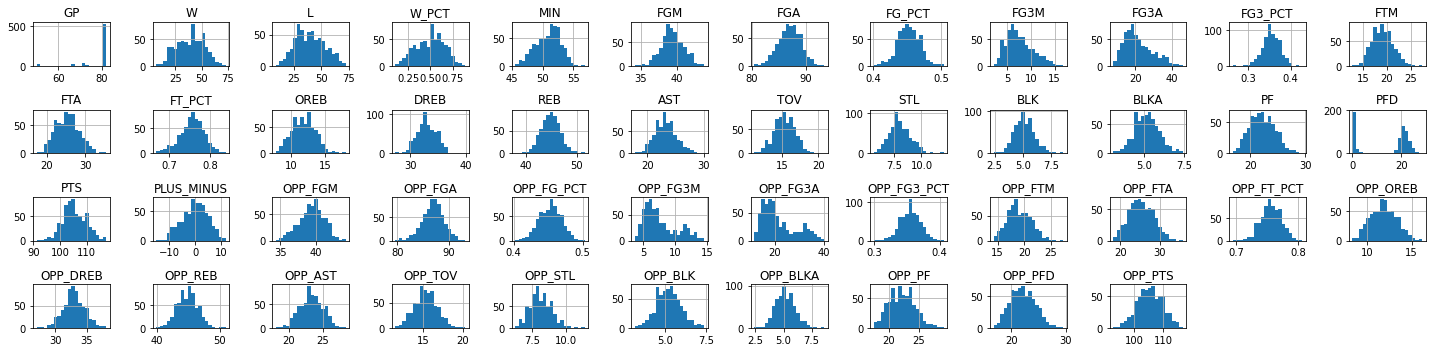

In [ ]:
# plot distributions of each numeric column
# rank of each variable will exhibit uniform distribution
train_set.hist(bins=20, layout = (4, int(len(numeric_col) / 4) + 1))
plt.tight_layout()
plt.show()

In [ ]:
# outlier: PFD (Personal Fouls Drawn) with a high frequency at 0 while OPP_PF (ie PFD) has a more even distribution
train_set.PFD.value_counts(bins = np.linspace(train_set.PFD.min(), train_set.PFD.max(), 10, dtype=int)).sort_index()

(-0.001, 3.0]    211
(3.0, 6.0]         4
(6.0, 9.0]         0
(9.0, 12.0]        0
(12.0, 15.0]       0
(15.0, 18.0]       9
(18.0, 22.0]     265
(22.0, 25.0]     116
(25.0, 28.0]      11
Name: PFD, dtype: int64

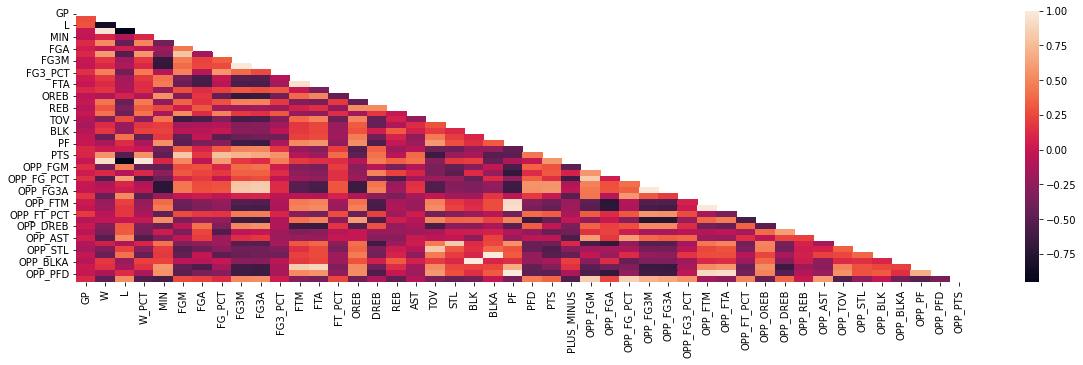

In [ ]:
# normal observations:
## positive correlation between Wins and Plus Minus (net of points scored and lost per 100 posessions)
## negative correlation between FGM, FGA vs defensive stats (STL, BLK, PF) -> perhaps more effort on defensive end means less energy available on offensive end

# interesting observations:
## negative correlation between OREB and (FG3M, FG3A, FG3%) but not so much with FG -> missing shots lead to more OREB and fewer attempts
## positive correlation between DREB and (FG3M, FG3A, FG3%) but not so much with FG -> opponents missing shots lead to more risk taking in shooting 3 instead of 2
corr_mat = train_set.loc[:,numeric_col].corr()
sns.heatmap(corr_mat, 
            annot=False, 
            mask = np.triu(corr_mat)) # to show only lower triangle
plt.show()

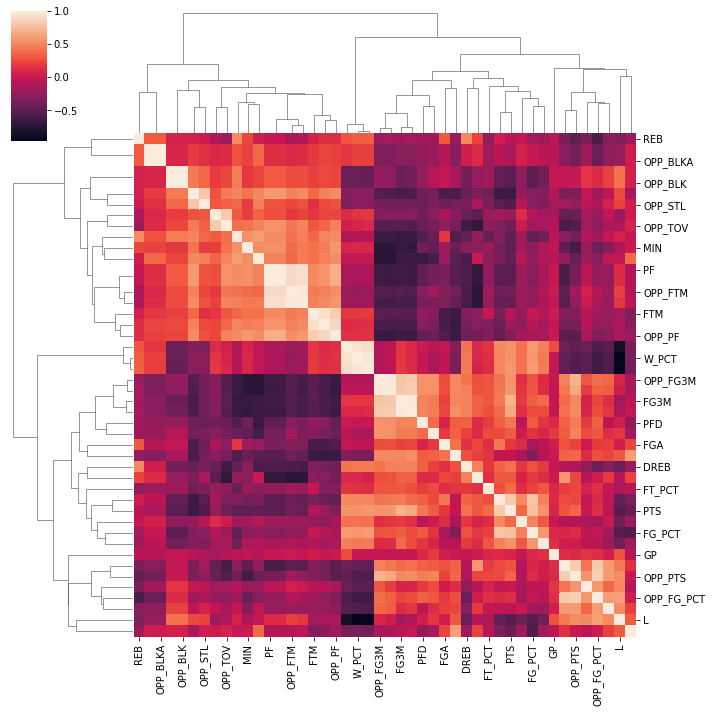

In [ ]:
# use dendrogram to see clusters
sns.clustermap(corr_mat)

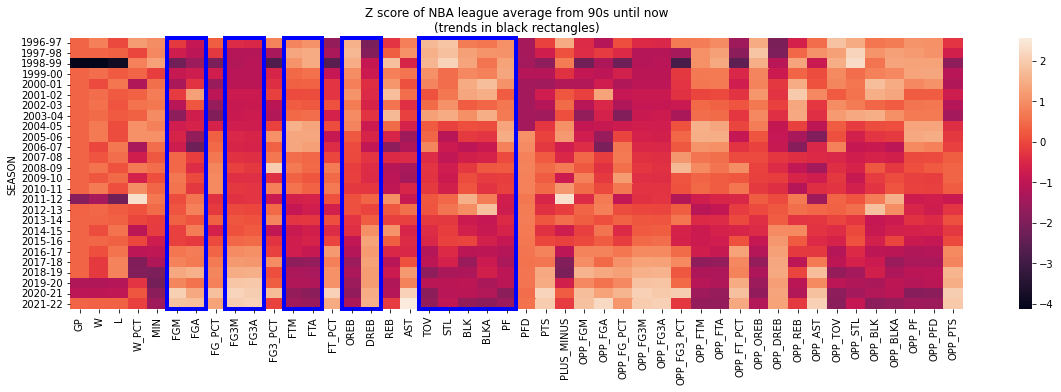

In [ ]:
# it's often mentioned that NBA teams in different era play with different styles
# we have already adjusted the stats per possession so pace doesn't impact the numbers here
# in 90s, teams play more defense and are more physical (higher PF, BLK, STL, TOV)
# in recent era, teams shoot more 3s and score more points (FG and FG3)
# Feature engineering: clustering for SEASON to take into account this difference 
ax = sns.heatmap(train_set.loc[:,numeric_col + ["SEASON"]].groupby("SEASON").mean().apply(zscore))
plt.title("Z score of NBA league average from 90s until now\n(trends in black rectangles)")
for col in [("FGM", "FGA"), ("FG3M", "FG3A"), ("FTM", "FTA"), ("OREB", "DREB"), ("TOV", "STL", "BLK", "BLKA", "PF")]:
  if len(col) > 1:
    ax.add_patch(Rectangle((numeric_col.index(col[0]), 0), len(col), len(train_set.SEASON.unique()), fill=False, edgecolor="blue", lw=4, clip_on=False))
  else:
    ax.add_patch(Rectangle((numeric_col.index(col), 0), 1, len(train_set.SEASON.unique()), fill=False, edgecolor="blue", lw=4, clip_on=False))
plt.show()

# check sklearn feature_selection

# Data preparation
- Over/Under-sampling to reduce imbalance in data
  - data set is highly imbalanced with only 1 out of 30 NBA teams winning the championship each year
  - however, over-sampling the champions may exacerbate the bias in our small sample
  - there is not enough data to under-sample as well
  - therefore let's keep it as is and use confusion matrix to measure performance accordingly
- Data cleaning
  - Fix PFD column with OPP_PF column
  - Drop irrelevant columns, e.g. GP (Games Played) is 82 for most seasons and stats are already normalized per 100 possessions
  - Feature scaling
    - Transform numeric variables by normal quantiles 
  
- Feature engineering
  - Cluster similar seasons together with KMeans to represent different NBA eras
  - Add column "FG2A" = "FGA" - "FG3A" and "FG2M" = "FGM" - "FG3M"
  - Add column "FG2A"/"FG3A" to represent % of 2-point shots taken vs 3-point shots taken

- Dimensionality reduction
  - PCA to speed up random forest and fix axis orientation issue with decision tree

- Feature selection
  - Use random forest to drop useless features

In [4]:
# make a copy and split X and y 
season = train_set.drop(columns = "PLAYOFF_RANKING").reset_index(drop = True).copy()
season_label = train_set[["PLAYOFF_RANKING"]].values.reshape(-1,)

In [5]:
# X_train before data preparation
season

,TEAM_ID,TEAM_NAME,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,CFID,CFPARAMS,OPP_FGM,OPP_FGA,OPP_FG_PCT,OPP_FG3M,OPP_FG3A,OPP_FG3_PCT,OPP_FTM,OPP_FTA,OPP_FT_PCT,OPP_OREB,OPP_DREB,OPP_REB,OPP_AST,OPP_TOV,OPP_STL,OPP_BLK,OPP_BLKA,OPP_PF,OPP_PFD,OPP_PTS,SEASON,UNIQUE_ID
0,1610612741,Chicago Bulls,82,69,13,0.841,52.5,43.6,92.0,0.473,7.0,18.7,0.373,18.4,24.6,0.747,16.4,32.7,49.1,28.5,14.7,9.5,4.4,3.8,21.5,0.2,112.4,11.8,10,Chicago Bulls,38.5,88.4,0.436,6.3,18.7,0.335,17.3,23.5,0.737,14.5,29.3,43.8,21.5,17.2,8.3,3.8,4.4,23.0,21.5,100.7,1996-97,1610612741199697
1,1610612737,Atlanta Hawks,82,56,26,0.683,54.2,38.5,86.3,0.446,9.0,25.1,0.360,20.4,26.8,0.763,14.0,32.2,46.2,21.3,16.8,9.6,5.8,4.5,21.8,0.1,106.4,6.1,10,Atlanta Hawks,38.4,88.3,0.435,6.6,19.2,0.347,16.9,22.9,0.737,14.3,30.4,44.8,22.8,17.3,8.3,4.5,5.8,23.9,21.8,100.3,1996-97,1610612737199697
2,1610612750,Minnesota Timberwolves,82,40,42,0.488,52.1,38.7,84.8,0.456,4.9,14.4,0.339,21.6,28.7,0.751,12.6,30.3,42.9,24.7,16.4,8.1,7.3,5.9,24.0,0.2,103.9,-1.6,10,Minnesota Timberwolves,38.8,86.2,0.450,6.2,17.0,0.362,21.7,28.8,0.754,14.1,31.1,45.2,23.5,16.9,8.6,5.9,7.3,24.1,24.0,105.5,1996-97,1610612750199697
3,1610612762,Utah Jazz,82,64,18,0.780,52.7,41.6,82.7,0.504,4.4,12.0,0.370,24.7,32.1,0.769,11.8,32.0,43.9,29.2,16.7,9.9,5.6,5.0,26.3,0.2,112.4,9.6,10,Utah Jazz,36.0,82.3,0.438,6.9,19.7,0.352,23.9,31.8,0.750,12.7,27.9,40.7,21.2,17.7,8.5,5.0,5.6,27.2,26.3,102.8,1996-97,1610612762199697
4,1610612761,Toronto Raptors,82,30,52,0.366,52.1,38.1,87.2,0.437,7.7,21.3,0.363,19.0,26.4,0.720,14.9,29.6,44.5,22.5,17.7,9.5,6.8,5.8,24.8,0.1,102.9,-3.4,10,Toronto Raptors,39.1,84.0,0.465,6.5,18.8,0.348,21.6,29.9,0.724,13.6,30.9,44.5,25.9,17.6,8.9,5.8,6.8,23.6,24.8,106.3,1996-97,1610612761199697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,1610612742,Dallas Mavericks,82,52,30,0.634,50.2,40.9,88.7,0.461,13.6,38.9,0.350,17.0,22.1,0.771,9.6,35.2,44.8,24.4,13.0,7.0,4.1,3.8,20.5,20.9,112.5,3.4,10,Dallas Mavericks,40.6,88.9,0.457,11.4,33.5,0.340,16.5,21.5,0.767,9.9,35.6,45.5,24.5,13.6,7.3,3.8,4.1,20.9,20.5,109.1,2021-22,1610612742202122
613,1610612739,Cleveland Cavaliers,82,44,38,0.537,49.5,40.9,87.1,0.469,12.0,33.7,0.355,17.3,22.7,0.760,10.5,35.0,45.5,25.9,14.8,7.3,4.3,4.8,18.0,20.6,111.0,2.2,10,Cleveland Cavaliers,40.6,89.8,0.452,12.1,34.2,0.353,15.5,20.0,0.774,10.8,33.4,44.1,24.8,13.8,8.7,4.8,4.3,20.6,18.0,108.8,2021-22,1610612739202122
614,1610612741,Chicago Bulls,82,46,36,0.561,48.6,42.1,87.7,0.480,10.7,29.1,0.369,17.7,21.7,0.813,8.8,34.0,42.7,24.1,13.0,7.2,4.1,5.0,19.0,18.3,112.7,-0.4,10,Chicago Bulls,41.8,88.3,0.474,11.8,32.3,0.366,17.6,22.1,0.795,9.4,34.2,43.6,25.2,13.2,7.2,5.0,4.1,18.3,19.0,113.0,2021-22,1610612741202122
615,1610612766,Charlotte Hornets,82,43,39,0.524,47.8,42.2,90.1,0.468,13.7,37.6,0.365,15.6,21.1,0.740,10.7,33.2,43.9,27.7,13.1,8.5,4.8,4.5,19.6,19.3,113.6,0.4,10,Charlotte Hornets,41.4,88.8,0.466,13.8,38.1,0.362,16.6,21.8,0.763,11.2,35.1,46.3,26.1,14.8,7.4,4.5,4.8,19.3,19.6,113.2,2021-22,1610612766202122


In [6]:
# y_train before data preparation
season_label

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## Feature engineering - NewColumn
- Before data cleaning
- Add column "FG2A" = "FGA" - "FG3A" and "FG2M" = "FGM" - "FG3M"
- Add column "FG2A"/"FG3A" to represent % of 2-point shots taken vs 3-point shots taken

In [174]:
# create a custom transformer to perform numerical operations on columns 
# FunctionTransformer cannot be used in pipeline since it does not return the whole dataframe + the new columns
class NewColumn(BaseEstimator, TransformerMixin):
  def __init__(self):
    pass
  
  def fit(self, X, y = None):
    return self
  
  def transform(self, X):
    # 2 Point Field Goals Attempted = All Field Goals Attempted - 3 Point Field Goals Attempted
    output = X.copy()
    output['FG2A'] = output['FGA'] - output['FG3A']
    # 2 Point Field Goals Made
    output['FG2M'] = output['FGM'] - output['FG3M']
    # Percentage of 2 Point Field Goals Made
    output['FG2_PCT'] = output['FG2M'] / output['FG2A']
    # Ratio of 2 Point Field Goals Attempted to 3 Point Field Goals Attempted
    output['FG2_FG3'] = output['FG2A'] / output['FG3A']
    self.output_names = output.columns
    return output
  
  def get_feature_names_out(self, names = None):
    return self.output_names

In [176]:
NewColumn().fit_transform(season)

,TEAM_ID,TEAM_NAME,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,CFID,CFPARAMS,OPP_FGM,OPP_FGA,OPP_FG_PCT,OPP_FG3M,OPP_FG3A,OPP_FG3_PCT,OPP_FTM,OPP_FTA,OPP_FT_PCT,OPP_OREB,OPP_DREB,OPP_REB,OPP_AST,OPP_TOV,OPP_STL,OPP_BLK,OPP_BLKA,OPP_PF,OPP_PFD,OPP_PTS,SEASON,UNIQUE_ID,FG2A,FG2M,FG2_PCT,FG2_FG3
0,1610612741,Chicago Bulls,82,69,13,0.841,52.5,43.6,92.0,0.473,7.0,18.7,0.373,18.4,24.6,0.747,16.4,32.7,49.1,28.5,14.7,9.5,4.4,3.8,21.5,0.2,112.4,11.8,10,Chicago Bulls,38.5,88.4,0.436,6.3,18.7,0.335,17.3,23.5,0.737,14.5,29.3,43.8,21.5,17.2,8.3,3.8,4.4,23.0,21.5,100.7,1996-97,1610612741199697,73.3,36.6,0.499318,3.919786
1,1610612737,Atlanta Hawks,82,56,26,0.683,54.2,38.5,86.3,0.446,9.0,25.1,0.360,20.4,26.8,0.763,14.0,32.2,46.2,21.3,16.8,9.6,5.8,4.5,21.8,0.1,106.4,6.1,10,Atlanta Hawks,38.4,88.3,0.435,6.6,19.2,0.347,16.9,22.9,0.737,14.3,30.4,44.8,22.8,17.3,8.3,4.5,5.8,23.9,21.8,100.3,1996-97,1610612737199697,61.2,29.5,0.482026,2.438247
2,1610612750,Minnesota Timberwolves,82,40,42,0.488,52.1,38.7,84.8,0.456,4.9,14.4,0.339,21.6,28.7,0.751,12.6,30.3,42.9,24.7,16.4,8.1,7.3,5.9,24.0,0.2,103.9,-1.6,10,Minnesota Timberwolves,38.8,86.2,0.450,6.2,17.0,0.362,21.7,28.8,0.754,14.1,31.1,45.2,23.5,16.9,8.6,5.9,7.3,24.1,24.0,105.5,1996-97,1610612750199697,70.4,33.8,0.480114,4.888889
3,1610612762,Utah Jazz,82,64,18,0.780,52.7,41.6,82.7,0.504,4.4,12.0,0.370,24.7,32.1,0.769,11.8,32.0,43.9,29.2,16.7,9.9,5.6,5.0,26.3,0.2,112.4,9.6,10,Utah Jazz,36.0,82.3,0.438,6.9,19.7,0.352,23.9,31.8,0.750,12.7,27.9,40.7,21.2,17.7,8.5,5.0,5.6,27.2,26.3,102.8,1996-97,1610612762199697,70.7,37.2,0.526167,5.891667
4,1610612761,Toronto Raptors,82,30,52,0.366,52.1,38.1,87.2,0.437,7.7,21.3,0.363,19.0,26.4,0.720,14.9,29.6,44.5,22.5,17.7,9.5,6.8,5.8,24.8,0.1,102.9,-3.4,10,Toronto Raptors,39.1,84.0,0.465,6.5,18.8,0.348,21.6,29.9,0.724,13.6,30.9,44.5,25.9,17.6,8.9,5.8,6.8,23.6,24.8,106.3,1996-97,1610612761199697,65.9,30.4,0.461305,3.093897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,1610612742,Dallas Mavericks,82,52,30,0.634,50.2,40.9,88.7,0.461,13.6,38.9,0.350,17.0,22.1,0.771,9.6,35.2,44.8,24.4,13.0,7.0,4.1,3.8,20.5,20.9,112.5,3.4,10,Dallas Mavericks,40.6,88.9,0.457,11.4,33.5,0.340,16.5,21.5,0.767,9.9,35.6,45.5,24.5,13.6,7.3,3.8,4.1,20.9,20.5,109.1,2021-22,1610612742202122,49.8,27.3,0.548193,1.280206
613,1610612739,Cleveland Cavaliers,82,44,38,0.537,49.5,40.9,87.1,0.469,12.0,33.7,0.355,17.3,22.7,0.760,10.5,35.0,45.5,25.9,14.8,7.3,4.3,4.8,18.0,20.6,111.0,2.2,10,Cleveland Cavaliers,40.6,89.8,0.452,12.1,34.2,0.353,15.5,20.0,0.774,10.8,33.4,44.1,24.8,13.8,8.7,4.8,4.3,20.6,18.0,108.8,2021-22,1610612739202122,53.4,28.9,0.541199,1.584570
614,1610612741,Chicago Bulls,82,46,36,0.561,48.6,42.1,87.7,0.480,10.7,29.1,0.369,17.7,21.7,0.813,8.8,34.0,42.7,24.1,13.0,7.2,4.1,5.0,19.0,18.3,112.7,-0.4,10,Chicago Bulls,41.8,88.3,0.474,11.8,32.3,0.366,17.6,22.1,0.795,9.4,34.2,43.6,25.2,13.2,7.2,5.0,4.1,18.3,19.0,113.0,2021-22,1610612741202122,58.6,31.4,0.535836,2.013746
615,1610612766,Charlotte Hornets,82,43,39,0.524,47.8,42.2,90.1,0.468,13.7,37.6,0.365,15.6,21.1,0.740,10.7,33.2,43.9,27.7,13.1,8.5,4.8,4.5,19.6,19.3,113.6,0.4,10,Charlotte Hornets,41.4,88.8,0.466,13.8,38.1,0.362,16.6,21.8,0.763,11.2,35.1,46.3,26.1,14.8,7.4,4.5,4.8,19.3,19.6,113.2,2021-22,1610612766202122,52.5,28.5,0.542857,1.396277


## Data cleaning - num_pipeline
- Custom transformers to fix and drop columns
- Scale numeric features by normal quantiles

In [177]:
# # create a custom transformer to remove outliers with Isolation Forest
# class OutlierRemover(BaseEstimator, TransformerMixin):
#   def __init__(self, random_state = None):
#     self.random_state = random_state
  
#   def fit(self, X, y = None, sample_weight = None):
#     self.X_ = X
#     return self
  
#   def transform(self, X):
#     # self.feature_names_in_ = X_season.columns
#     # self.index_names = X_season.sort_index().index.values
#     print(X.shape)
#     print(type(X))
#     self.isolationforest_ = IsolationForest(random_state=self.random_state)
#     outliers = self.isolationforest_.fit_predict(X)
#     print(outliers)
#     return X.iloc[outliers != -1].reset_index(drop = True)
  
#   def get_feature_names_out(self):
#     return self.X_.columns.values

In [178]:
# create a custom transformer to fix PF
class FixPF(BaseEstimator, TransformerMixin):
  def __init__(self, col_drop, col_replace):
    self.col_drop = col_drop
    self.col_replace = col_replace
  
  def fit(self, X, y = None):
    return self
  
  def transform(self, X):
    output = X.copy()
    output[[self.col_drop]] = output[[self.col_replace]]
    self.output_names = output.columns
    return output
  
  def get_feature_names_out(self, names = None):
    return self.output_names
  
# create a custom transformer to drop columns
class DropCols(BaseEstimator, TransformerMixin):
  def __init__(self, cols_drop):
    self.cols_drop = cols_drop
  
  def fit(self, X, y = None):
    return self
  
  def transform(self, X):
    output = X.copy()
    output = output.loc[:, [x not in self.cols_drop for x in output.columns]]
    self.output_names = output.columns
    return output
  
  def get_feature_names_out(self, names = None):
    return self.output_names

In [179]:
num_pipeline = make_pipeline(
    # replace PFD with OPP_PF since both columns should be the same but we saw issues with PFD column
    FixPF("PFD", "OPP_PF"),
    # drop irrelevant / duplicate columns
    DropCols(["GP", "MIN", "OPP_PF", "OPP_PFD"]),
    # feature scaling + outlier removal by transforming features into quantiles
      # some features have heavy tails, some look like normal so let's use transform them all to normal by quantile
      # instead of taking log for every feature
    QuantileTransformer(output_distribution="normal", random_state=42)
)

In [180]:
pd.DataFrame(num_pipeline.fit_transform(season.select_dtypes(include=np.number)),
             columns = num_pipeline.get_feature_names_out())

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2593: UserWarning: n_quantiles (1000) is greater than the total number of samples (617). n_quantiles is set to n_samples.
  "n_samples." % (self.n_quantiles, n_samples)


,W,L,W_PCT,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,OPP_FGM,OPP_FGA,OPP_FG_PCT,OPP_FG3M,OPP_FG3A,OPP_FG3_PCT,OPP_FTM,OPP_FTA,OPP_FT_PCT,OPP_OREB,OPP_DREB,OPP_REB,OPP_AST,OPP_TOV,OPP_STL,OPP_BLK,OPP_BLKA,OPP_PTS
0,2.943356,-2.721761,2.943356,2.721761,2.584916,1.296494,-0.057000,-0.229884,0.899274,-0.278219,-0.229884,-0.361759,2.336206,-0.103952,2.138607,2.584916,-0.425524,1.441829,-0.848600,-1.904707,-0.269769,0.346594,1.534121,5.199338,-0.573127,0.737137,-1.025357,-0.288809,-0.122381,-1.355292,-0.758667,-0.523467,-1.142499,1.802743,-2.202962,-0.634164,-1.011686,1.301224,0.276105,-1.904707,-0.848600,-1.127005
1,1.305983,-1.042720,1.207414,-0.561179,-0.355250,-0.407771,0.537519,0.556422,0.299432,0.624244,0.511835,0.190361,1.215892,-0.416631,0.750552,-1.053291,1.025357,1.603763,0.739810,-0.962021,-0.108044,0.800016,0.299432,1.268707,-0.626718,0.674490,-1.111778,-0.161432,-0.038667,-0.551678,-1.028805,-0.726500,-1.142499,1.626252,-1.459307,-0.059038,-0.310089,1.370745,0.276105,-0.962021,0.739810,-1.241867
2,-0.024418,0.227796,-0.136743,-0.392342,-1.001555,0.215285,-1.008297,-0.988206,-0.805633,1.093098,1.093098,-0.238249,0.394541,-1.547456,-1.004921,0.828358,0.750552,0.083516,2.251551,0.991526,0.791639,0.878136,-0.314361,-0.368283,-0.403353,-0.425524,-0.242437,-0.355250,-0.504890,0.418851,1.115560,1.082071,-0.122381,1.501923,-1.100524,0.213203,0.077392,1.085732,0.639147,0.991526,2.251551,0.028488
3,2.100165,-1.904707,2.100165,1.345167,-1.957194,5.199338,-1.207414,-1.483329,0.755956,2.584916,2.159077,0.412197,-0.012208,-0.535170,-0.544585,2.943356,0.949173,1.845705,0.539871,-0.236156,1.753330,2.138607,1.534121,2.336206,-1.823803,-2.031466,-0.911536,-0.002035,0.052924,-0.240342,2.064598,2.015702,-0.374823,0.530480,-2.943356,-2.647169,-1.203207,1.633934,0.514156,-0.236156,0.539871,-0.602145
4,-0.646652,0.842782,-0.734470,-0.828358,0.114185,-1.008297,0.177945,0.167619,0.427753,-0.002035,0.368283,-1.215892,1.802743,-2.064598,-0.194507,-0.374823,1.633934,1.441829,1.734710,0.887147,1.074793,0.621773,-0.587574,-0.684742,-0.211122,-1.408136,0.718575,-0.204885,-0.108044,-0.488776,1.063980,1.447606,-1.943564,1.142499,-1.211642,-0.227796,1.582058,1.561073,1.035737,0.887147,1.734710,0.169683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,0.917719,-0.666847,0.816943,0.971762,0.819787,0.523467,1.834644,2.082053,-0.246630,-0.942808,-1.001555,0.495666,-1.255174,1.233116,0.016278,0.674490,-1.603763,-1.146415,-1.264171,-1.904707,-0.682173,-0.530480,1.589210,0.666847,0.682173,0.991526,0.225708,1.074793,1.397252,-1.011686,-1.211642,-1.277860,0.634164,-1.282477,1.514614,0.390146,0.661773,-1.150349,-1.018498,-1.904707,-1.264171,0.772303
613,0.299432,-0.095772,0.171747,0.971762,0.065153,1.035737,1.330233,1.315590,0.048850,-0.766831,-0.755956,0.110090,-0.723853,1.082071,0.379192,1.340155,-0.357418,-0.802821,-0.975030,-0.518806,-2.138607,-0.671938,1.228776,0.377006,0.682173,1.424780,-0.124431,1.430417,1.527554,-0.165556,-1.725621,-1.792506,1.096804,-0.644146,0.305822,-0.416631,0.839883,-1.021921,0.761383,-0.518806,-0.975030,0.687317
614,0.441169,-0.231974,0.325068,1.782453,0.318639,1.699178,0.978308,0.908458,0.726500,-0.570731,-1.166267,2.000424,-1.880317,0.554049,-1.146415,0.504890,-1.603763,-0.911536,-1.264171,-0.236156,-1.441829,-1.985599,1.626252,-0.097817,1.527554,0.674490,1.381232,1.264171,1.119359,0.739810,-0.599707,-1.018498,2.441895,-1.753330,0.708079,-0.739810,1.032265,-1.402673,-1.166267,-0.236156,-1.264171,1.762872
615,0.231974,-0.028488,0.108044,1.917340,1.596444,0.945986,1.904707,1.904707,0.549311,-1.753330,-1.408136,-0.621773,-0.592417,0.163494,-0.544585,2.138607,-1.521052,0.479626,-0.353083,-0.962021,-1.150349,-1.391872,1.823803,0.065153,1.170293,0.939639,0.775047,2.368567,2.368567,0.418851,-1.170293,-1.162260,0.414413,-0.443412,1.259660,0.872168,1.72

## Feature engineering - SeasonSimilarity
- After feature scaling
- Use silhouette score to measure performance of clustering
- Perform soft clustering on SEASON with KMeans to differentiate NBA eras

In [269]:
# create a custom transformer to cluster nba seasons into era
class SeasonSimilarity(BaseEstimator, TransformerMixin):
  def __init__(self, n_clusters = 3, random_state = None):
    self.n_clusters = n_clusters
    self.random_state = random_state
  
  def fit(self, X, y = None, sample_weight = None):
    # group by season to get league average
    X_season = X.groupby("SEASON").mean().sort_index()
    self.feature_names_in_ = X.columns.values
    self.index_names = X_season.sort_index().index.values
    
    # test performance with silhouette score (distance from one's center and from other centers) from 2 to 10 clusters
    # we cannot tune this as hyperparameter with CV because once we apply CV, the cluster center will change
    # e.g. clustering based on records from 1996 to 2022 (full range) vs clustering based on records from 2010 to 2022 (1st fold)
    k_range = np.arange(2,11,1)
    silh_scores = []
    for k in range(2,11):
      self.n_clusters = k
      self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
      self.kmeans_.fit(X_season, sample_weight=sample_weight)
      silh_scores.append(silhouette_score(X_season, self.kmeans_.labels_))
    
    max_k = k_range[np.argmax(silh_scores)]
    max_silh = max(silh_scores)
    plt.plot(k_range, silh_scores)
    plt.xlabel("Number of clusters")
    plt.ylabel("Silhouette score")
    plt.title(f"optimal no. of cluster = {max_k}, silhouette score = {max_silh:0.4f}")
    plt.show()
    
    self.n_clusters = max_k
    self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
    self.kmeans_.fit(X_season, sample_weight=sample_weight)
    return self
  
  def transform(self, X):
    
    X_season = X.groupby("SEASON").mean().sort_index()
    # soft clustering for n clusters + quantile transform = normalized cluster distance
    X_clusterdist = QuantileTransformer(output_distribution="normal", random_state=42).fit_transform(self.kmeans_.transform(X_season))
    # X_clusterdist = self.kmeans_.transform(X_season)
    X_cluster = pd.DataFrame(X_clusterdist, index = X_season.index, columns=[f"ERA_{i}" for i in range(self.n_clusters)]).reset_index()
    output = X[["SEASON"]].merge(X_cluster, how = "inner", on = "SEASON")
    output.drop(columns = ["SEASON"], inplace = True)
    output.index = X[["SEASON"]]
    self.output_features = output.columns.values
    
    return output
  
  def get_feature_names_out(self, names = None):
    return self.output_features

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2593: UserWarning: n_quantiles (1000) is greater than the total number of samples (617). n_quantiles is set to n_samples.
  "n_samples." % (self.n_quantiles, n_samples)


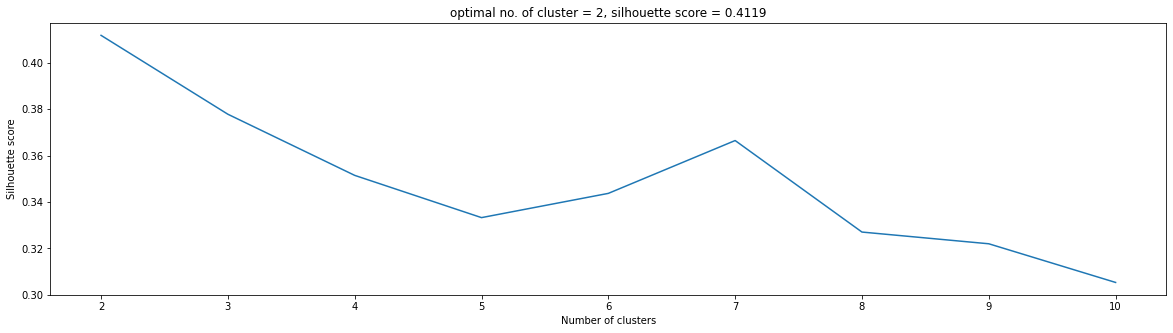

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2593: UserWarning: n_quantiles (1000) is greater than the total number of samples (26). n_quantiles is set to n_samples.
  "n_samples." % (self.n_quantiles, n_samples)


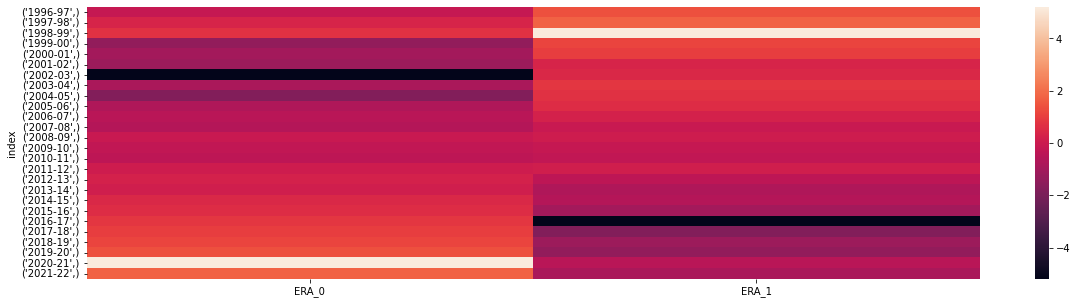

In [272]:
# standardize before 
num_df = pd.concat([pd.DataFrame(num_pipeline.fit_transform(season.select_dtypes(include=np.number)),
             columns = num_pipeline.get_feature_names_out()), 
           season['SEASON']], axis = 1)
sns.heatmap(SeasonSimilarity(random_state=42).fit_transform(num_df).reset_index().groupby(["index"]).mean())

### Alternative: agglomerative clustering

In [184]:
# from sklearn.cluster import AgglomerativeClustering
# from scipy.cluster.hierarchy import dendrogram

# # create a custom transformer to cluster nba seasons into era
# class SeasonSimilarity2(BaseEstimator, TransformerMixin):
#   def __init__(self, n_clusters = 3, compute_distances = True):
#     self.n_clusters = n_clusters
#     self.compute_distances = compute_distances
  
#   def fit(self, X, y = None, sample_weight = None):
#     # group by season to get league average
#     X_season = X.groupby("SEASON").mean().sort_index()
#     self.feature_names_in_ = X.columns.values
#     self.index_names = X_season.sort_index().index.values
#     self.agg_cluster_ = AgglomerativeClustering(n_clusters=self.n_clusters, compute_distances=self.compute_distances)
#     self.agg_cluster_.fit(X_season)
#     return self
  
#   def transform(self, X):
#     X_season = X.groupby("SEASON").mean().sort_index()
#     X_cluster = pd.DataFrame(self.agg_cluster_.predict(X_season), index = X_season.index, columns=[f"ERA_{i}" for i in range(self.n_clusters)]).reset_index()
#     output = X[["SEASON"]].merge(X_cluster, how = "inner", on = "SEASON")
#     output.drop(columns = ["SEASON"], inplace = True)
#     output.index = X[["SEASON"]]
#     self.output_features = output.columns.values
#     return output
  
#   def get_feature_names_out(self, names = None):
#     return self.output_features

#   def plot_dendrogram(self, **kwargs):
#     model = self.agg_cluster_
#     def create_plot(model, **kwargs):
#       # Create linkage matrix and then plot the dendrogram

#       # create the counts of samples under each node
#       counts = np.zeros(model.children_.shape[0])
#       n_samples = len(model.labels_)
#       for i, merge in enumerate(model.children_):
#           current_count = 0
#           for child_idx in merge:
#               if child_idx < n_samples:
#                   current_count += 1  # leaf node
#               else:
#                   current_count += counts[child_idx - n_samples]
#           counts[i] = current_count

#       linkage_matrix = np.column_stack(
#           [model.children_, model.distances_, counts]
#       )

#       # Plot the corresponding dendrogram
#       dendrogram(linkage_matrix, **kwargs)

#     create_plot(model, truncate_mode="level", p=20)
#     plt.xlabel("Number of points in node (or index of point if no parenthesis).")
#     locs, labels = plt.xticks() 
#     plt.xticks(locs, [season['SEASON'].unique().to_list()[int(x.get_text())] for x in labels])
#     plt.show()

In [185]:
# agg_cluster = SeasonSimilarity2(n_clusters = 3, compute_distances=True).fit(season)
# agg_cluster.plot_dendrogram()

## Combine transformers as a pipeline

In [229]:
data_preparation = make_pipeline(
    # create new columns for FG2A, FG2M, FG2_PCT, FG2_FG3
    NewColumn(),
    ColumnTransformer(
      [
      # fixing and scaling numeric columns
      ("num", num_pipeline, make_column_selector(dtype_include=np.number)),
      # KMeans clustering on SEASON to create columns representing different NBA eras
      ("era", SeasonSimilarity(random_state=42), make_column_selector(dtype_include=[np.number,"category"])),
      ], 
      # drop remaining identifier columns such as TEAM_ID
      remainder="drop",
      # drop column prefix
      verbose_feature_names_out = False, 
    )
)

season_prepared = pd.DataFrame(data_preparation.fit_transform(season),
                               columns = data_preparation.get_feature_names_out())
season_prepared

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2593: UserWarning: n_quantiles (1000) is greater than the total number of samples (617). n_quantiles is set to n_samples.
  "n_samples." % (self.n_quantiles, n_samples)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2593: UserWarning: n_quantiles (1000) is greater than the total number of samples (26). n_quantiles is set to n_samples.
  "n_samples." % (self.n_quantiles, n_samples)


,W,L,W_PCT,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,OPP_FGM,OPP_FGA,OPP_FG_PCT,OPP_FG3M,OPP_FG3A,OPP_FG3_PCT,OPP_FTM,OPP_FTA,OPP_FT_PCT,OPP_OREB,OPP_DREB,OPP_REB,OPP_AST,OPP_TOV,OPP_STL,OPP_BLK,OPP_BLKA,OPP_PTS,FG2A,FG2M,FG2_PCT,FG2_FG3,ERA_0,ERA_1,ERA_2
0,2.943356,-2.721761,2.943356,2.721761,2.584916,1.296494,-0.057000,-0.229884,0.899274,-0.278219,-0.229884,-0.361759,2.336206,-0.103952,2.138607,2.584916,-0.425524,1.441829,-0.848600,-1.904707,-0.269769,0.346594,1.534121,5.199338,-0.573127,0.737137,-1.025357,-0.288809,-0.122381,-1.355292,-0.758667,-0.523467,-1.142499,1.802743,-2.202962,-0.634164,-1.011686,1.301224,0.276105,-1.904707,-0.848600,-1.127005,1.178402,2.031466,0.580336,0.383568,-0.582842,0.150969,0.467699
1,1.305983,-1.042720,1.207414,-0.561179,-0.355250,-0.407771,0.537519,0.556422,0.299432,0.624244,0.511835,0.190361,1.215892,-0.416631,0.750552,-1.053291,1.025357,1.603763,0.739810,-0.962021,-0.108044,0.800016,0.299432,1.268707,-0.626718,0.674490,-1.111778,-0.161432,-0.038667,-0.551678,-1.028805,-0.726500,-1.142499,1.626252,-1.459307,-0.059038,-0.310089,1.370745,0.276105,-0.962021,0.739810,-1.241867,-0.646652,-0.881131,-0.016278,-0.589994,-0.582842,0.150969,0.467699
2,-0.024418,0.227796,-0.136743,-0.392342,-1.001555,0.215285,-1.008297,-0.988206,-0.805633,1.093098,1.093098,-0.238249,0.394541,-1.547456,-1.004921,0.828358,0.750552,0.083516,2.251551,0.991526,0.791639,0.878136,-0.314361,-0.368283,-0.403353,-0.425524,-0.242437,-0.355250,-0.504890,0.418851,1.115560,1.082071,-0.122381,1.501923,-1.100524,0.213203,0.077392,1.085732,0.639147,0.991526,2.251551,0.028488,0.616844,0.851520,-0.118282,0.914623,-0.582842,0.150969,0.467699
3,2.100165,-1.904707,2.100165,1.345167,-1.957194,5.199338,-1.207414,-1.483329,0.755956,2.584916,2.159077,0.412197,-0.012208,-0.535170,-0.544585,2.943356,0.949173,1.845705,0.539871,-0.236156,1.753330,2.138607,1.534121,2.336206,-1.823803,-2.031466,-0.911536,-0.002035,0.052924,-0.240342,2.064598,2.015702,-0.374823,0.530480,-2.943356,-2.647169,-1.203207,1.633934,0.514156,-0.236156,0.539871,-0.602145,0.664308,2.584916,1.250714,1.365557,-0.582842,0.150969,0.467699
4,-0.646652,0.842782,-0.734470,-0.828358,0.114185,-1.008297,0.177945,0.167619,0.427753,-0.002035,0.368283,-1.215892,1.802743,-2.064598,-0.194507,-0.374823,1.633934,1.441829,1.734710,0.887147,1.074793,0.621773,-0.587574,-0.684742,-0.211122,-1.408136,0.718575,-0.204885,-0.108044,-0.488776,1.063980,1.447606,-1.943564,1.142499,-1.211642,-0.227796,1.582058,1.561073,1.035737,0.887147,1.734710,0.169683,-0.089642,-0.592417,-0.958794,-0.163494,-0.582842,0.150969,0.467699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,0.917719,-0.666847,0.816943,0.971762,0.819787,0.523467,1.834644,2.082053,-0.246630,-0.942808,-1.001555,0.495666,-1.255174,1.233116,0.016278,0.674490,-1.603763,-1.146415,-1.264171,-1.904707,-0.682173,-0.530480,1.589210,0.666847,0.682173,0.991526,0.225708,1.074793,1.397252,-1.011686,-1.211642,-1.277860,0.634164,-1.282477,1.514614,0.390146,0.661773,-1.150349,-1.018498,-1.904707,-1.264171,0.772303,-1.943564,-1.527554,1.868529,-2.031466,1.750686,1.405072,-1.750686
613,0.299432,-0.095772,0.171747,0.971762,0.065153,1.035737,1.330233,1.315590,0.048850,-0.766831,-0.755956,0.110090,-0.723853,1.082071,0.379192,1.340155,-0.357418,-0.802821,-0.975030,-0.518806,-2.138607,-0.671938,1.228776,0.377006,0.682173,1.424780,-0.124431,1.430417,1.527554,-0.165556,-1.725621,-1.792506,1.096804,-0.644146,0.305822,-0.416631,0.839883,-1.021921,0.761383,-0.518806,-0.975030,0.687317,-1.408136,-1.093098,1.641714,-1.375969,1.750686,1.405072,-1.750686
614,0.441169,-0.231974,0.325068,1.782453,0.318639,1.699178,0.978308,0.908458,0.726500,-0.570731,-1.166267,2.000424,-1.880317,0.554049,-1.146415,0.504890,-1.603763,-0.911536,-1.264171,-0.236156,-1.441829,-1.985599,

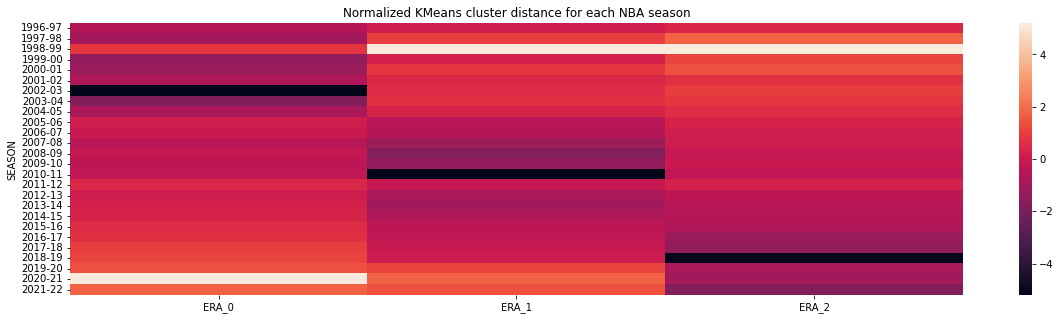

In [187]:
sns.heatmap(pd.concat([season[['SEASON']], season_prepared[['ERA_0', 'ERA_1', 'ERA_2']]], axis=1).groupby('SEASON').mean())
plt.title("Normalized KMeans cluster distance for each NBA season")
plt.show()

## (optional) Dimensionality reduction
- advantage
  - PCA can solve the axis orientation issue with decision tree
- disadvantage
  - information loss
  - harder to maintain pipeline as new data comes in
    - assume the current dataset is a random sampling of the underlying population, the PCA components should be stable
- considerations
  - let's not use PCA to allow interpretation of our feature
  - if we need to use decision tree, we can still use random forests or other ensemble methods on top of it
  - but random forest still assign high feature importance to highly correlated features (e.g. W_PCT, W, L)

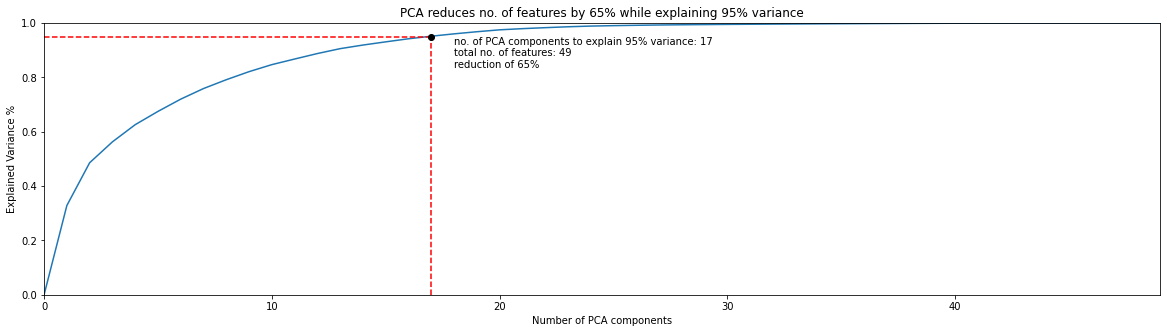

In [188]:
pca = PCA().fit(season_prepared)
pca_cumsum = np.cumsum(pca.explained_variance_ratio_)
# aim for 95% variance explained
target = np.argmax(pca_cumsum >= 0.95) + 1 # python starts counting at 0
plt.plot([*range(0,len(pca_cumsum)+1)], [0, *pca_cumsum])
plt.xlim(0,len(pca_cumsum))
plt.ylim(0,1)
plt.xlabel("Number of PCA components")
plt.ylabel("Explained Variance %")
plt.plot([target, target], [0, 0.95], 'r--')
plt.plot([0, target], [0.95, 0.95], 'r--')
plt.plot(target, 0.95, 'ko')
plt.annotate(f"no. of PCA components to explain 95% variance: {target}\n" + 
             f"total no. of features: {pca.n_features_in_}\n" + 
             f"reduction of {(pca.n_features_in_ - target) / pca.n_features_in_:0.0%}", 
             [target+1, 0.95],
             ha = 'left',
             va = 'top')
plt.title(f"PCA reduces no. of features by {(pca.n_features_in_ - target) / pca.n_features_in_:0.0%} while explaining 95% variance")
plt.show()

In [189]:
# don't add to data_preparation pipeline
# while PCA can help reduce no. of features significantly, reduce training time and avoid axis orientation issues in decision tree, 
# I want to keep features interpretable given the dataset is not too large

# data_preparation.steps.append(
#     ("pca", PCA(n_components=0.95))
# )

In [195]:
# print(f"target no. of features to explain 95% variance = {data_preparation.fit_transform(season).shape[1]}")

## Final pipeline = data_preparation



In [105]:
data_preparation

Pipeline(steps=[('newcolumn', NewColumn()),
                ('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('fixpf',
                                                                   FixPF(col_drop='PFD',
                                                                         col_replace='OPP_PF')),
                                                                  ('dropcols',
                                                                   DropCols(cols_drop=['GP',
                                                                                       'MIN',
                                                                                       'OPP_PF',
                                                                                       'OPP_PFD'])),
                                                                  ('quantiletransformer',
                                             

In [27]:
X_train = data_preparation.fit_transform(season)
y_train = season_label.copy()

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2593: UserWarning: n_quantiles (1000) is greater than the total number of samples (617). n_quantiles is set to n_samples.
  "n_samples." % (self.n_quantiles, n_samples)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2593: UserWarning: n_quantiles (1000) is greater than the total number of samples (26). n_quantiles is set to n_samples.
  "n_samples." % (self.n_quantiles, n_samples)


In [29]:
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Colab Notebooks')

Mounted at /content/drive


In [ ]:
# download local copy to upload to Github
os.chdir('/content/drive/MyDrive/Colab Notebooks')
pd.DataFrame(X_train).to_csv("nba_season_prepared.csv", index = False)
pd.DataFrame(y_train).to_csv("nba_season_label.csv", index = False)

files.download("nba_season_prepared.csv")
files.download("nba_season_label.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


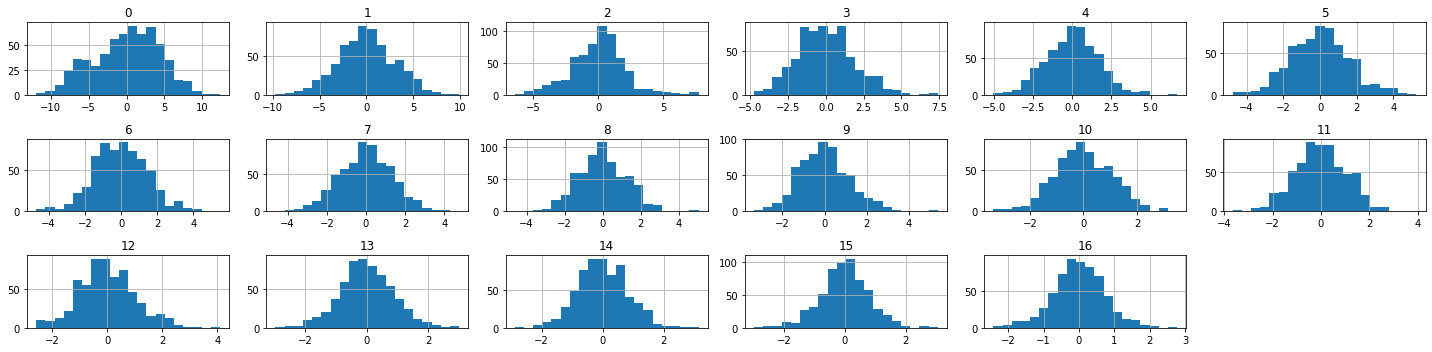

In [ ]:
# plot distributions of each feature in X_train
fig, ax = plt.subplots(1,1)
plot_df = pd.DataFrame(X_train)
plot_df.hist(bins = 20, layout = (int(plot_df.shape[1] / 6) + 1, 6),
             ax = ax)
plt.title("Distribution of each feature after cleaning")
plt.tight_layout()

# Feature selection with Random Forest
- optional given we already reduce the number of features by a lot with PCA

In [230]:
selector = SelectFromModel(
    LogisticRegression(penalty='l1', random_state=42, solver='liblinear'),
    # RandomForestClassifier(random_state=42),
    threshold="mean" # set threshold to 0 to get all the features out
    ).fit(pd.DataFrame(data_preparation.fit_transform(season),
                               columns = data_preparation.get_feature_names_out()), 
          season_label.reshape(-1,))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2593: UserWarning: n_quantiles (1000) is greater than the total number of samples (617). n_quantiles is set to n_samples.
  "n_samples." % (self.n_quantiles, n_samples)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2593: UserWarning: n_quantiles (1000) is greater than the total number of samples (26). n_quantiles is set to n_samples.
  "n_samples." % (self.n_quantiles, n_samples)


In [231]:
season.shape

(617, 52)

In [233]:
selector.transform(pd.DataFrame(data_preparation.fit_transform(season),
                               columns = data_preparation.get_feature_names_out())).shape

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2593: UserWarning: n_quantiles (1000) is greater than the total number of samples (617). n_quantiles is set to n_samples.
  "n_samples." % (self.n_quantiles, n_samples)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2593: UserWarning: n_quantiles (1000) is greater than the total number of samples (26). n_quantiles is set to n_samples.
  "n_samples." % (self.n_quantiles, n_samples)


(617, 15)

In [240]:
data_preparation.get_feature_names_out()[~selector.get_support()]

array(['L', 'W_PCT', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FTM', 'FTA',
       'OREB', 'REB', 'AST', 'TOV', 'STL', 'BLK', 'PFD', 'PTS', 'OPP_FGM',
       'OPP_FG3M', 'OPP_FG3A', 'OPP_FG3_PCT', 'OPP_FTM', 'OPP_FT_PCT',
       'OPP_OREB', 'OPP_DREB', 'OPP_TOV', 'OPP_STL', 'OPP_BLK',
       'OPP_BLKA', 'OPP_PTS', 'FG2A', 'FG2M', 'FG2_FG3', 'ERA_0', 'ERA_1'],
      dtype=object)

In [235]:
selector.get_feature_names_out()

array(['W', 'FGM', 'FG3_PCT', 'FT_PCT', 'DREB', 'BLKA', 'PF',
       'PLUS_MINUS', 'OPP_FGA', 'OPP_FG_PCT', 'OPP_FTA', 'OPP_REB',
       'OPP_AST', 'FG2_PCT', 'ERA_2'], dtype=object)

In [198]:
ranked_PCA_components = [*sorted(zip(selector.estimator_.feature_importances_, selector.get_feature_names_out()), reverse = True)]
fig, ax = plt.subplots(1,1)
ax.bar([x[1] for x in ranked_PCA_components], [x[0] for x in ranked_PCA_components])
for num in ranked_PCA_components:
    ax.annotate(f"{num[0]:0.3f}", (num[1], num[0]), ha = 'center', va = 'bottom')
plt.xlabel("PCA components")
plt.ylabel("Feature importance")

AttributeError: ignored

In [96]:
# let's keep every PCA component
# data_preparation.steps.append(
#     ("selector", SelectFromModel(
#     RandomForestClassifier(random_state=42),
#     threshold=0 # adjust this to reduce computing time
#     ))
# )

# + LDA to list of classifiers

# Shortlist promising models
- missing 
  - analyze most significant variables for each algorithm
  - analyze the type of errors the models make
    - what data would a human to use avoid these errors
  - perform a quick round of feature engineering and selection
  - shortlist models making different types of error

In [30]:
# retrieve values
X_train = pd.read_csv('https://github.com/WillKWL/PublicData/raw/main/processed/nba_season_prepared.csv').values
y_train = pd.read_csv('https://github.com/WillKWL/PublicData/raw/main/processed/nba_season_label.csv').values.reshape(-1,)

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score

In [33]:
# create a list of models using standard hyperparameters to compare performance
dict_clf = {
    "knn": KNeighborsClassifier(),
    "sgd": SGDClassifier(random_state=42),
    "logistic": LogisticRegression(random_state=42),
    "svc": LinearSVC(random_state=42, max_iter=10**5),
    "svc_poly": SVC(kernel='poly'),
    "svc_rbf": SVC(kernel='rbf'),
    "tree": DecisionTreeClassifier(random_state=42),
    "forest": RandomForestClassifier(random_state=42)
}

list_clf = []
auc_scores = []
list_fpr = []
list_tpr = []
list_thresholds = []

# fit each classification algorithm and calculate 10-fold CV AUC
cv = 10
for key, item in dict_clf.items():
  clf = item.fit(X_train, y_train)
  auc_score = cross_val_score(clf, X_train, y_train, cv = cv, scoring = 'roc_auc')
  try:
    y_scores = cross_val_predict(clf, X_train, y_train, cv = cv, method = 'decision_function')
  # if the classifier does not have decision_function attribute, then use predict_proba
  except AttributeError:
    y_scores = cross_val_predict(clf, X_train, y_train, cv = cv, method = 'predict_proba')[:,1] # second column = probability of positive class
  
  fpr, tpr, thresholds = roc_curve(y_train, y_scores)

  list_clf.append(key)
  # auc_scores.append(roc_auc_score(y_train, y_scores))
  auc_scores.append(auc_score)
  list_fpr.append(fpr)
  list_tpr.append(tpr)
  list_thresholds.append(thresholds)
  

In [34]:
# sort the models by AUC but not other performance metrics dependent on decision threshold, e.g. precision and recall
mean_auc = [np.mean(auc) for auc in auc_scores]
sd_auc = [np.std(auc) for auc in auc_scores]
print("Models sorted by cross validation AUC score")
for mean, sd, clf_name in sorted(zip(mean_auc, sd_auc, list_clf), reverse = True):
  print(f"CV AUC: AVG {mean:0.4f} / SD {sd:0.4f} / {clf_name}")

Models sorted by cross validation AUC score
CV AUC: AVG 0.9447 / SD 0.0434 / logistic
CV AUC: AVG 0.9416 / SD 0.0437 / svc
CV AUC: AVG 0.9382 / SD 0.0454 / sgd
CV AUC: AVG 0.8891 / SD 0.0926 / forest
CV AUC: AVG 0.8844 / SD 0.0586 / svc_rbf
CV AUC: AVG 0.8191 / SD 0.1258 / svc_poly
CV AUC: AVG 0.7131 / SD 0.1953 / knn
CV AUC: AVG 0.5106 / SD 0.0862 / tree


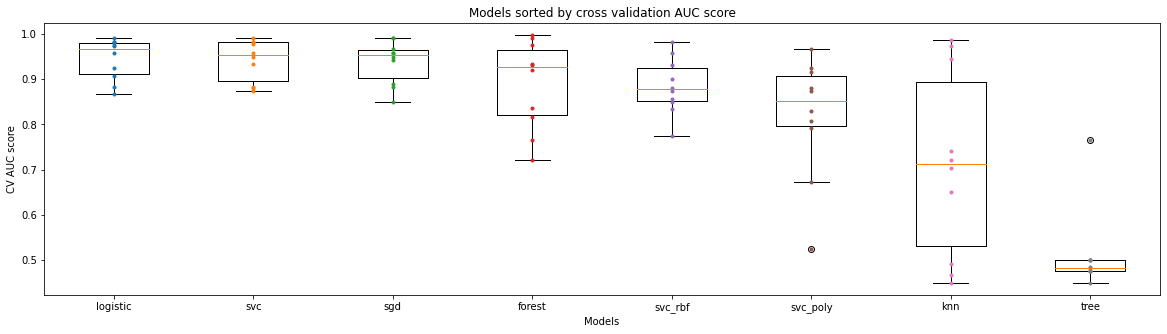

In [35]:
# sort the models and plot the spread of CV AUC scores
mean_auc = [np.mean(auc) for auc in auc_scores]
sorted_auc = [i for _, i in sorted(zip(mean_auc, auc_scores), reverse = True)]
sorted_clf = [i for _, i in sorted(zip(mean_auc, list_clf), reverse = True)]
plt.boxplot(sorted_auc, labels=sorted_clf)
# add dots for CV AUC scores
for i, auc in zip(range(1,len(sorted_clf)+1), sorted_auc):
  plt.plot([i]*len(auc), auc, ".")
plt.title("Models sorted by cross validation AUC score")
plt.xlabel("Models")
plt.ylabel("CV AUC score")
plt.show()

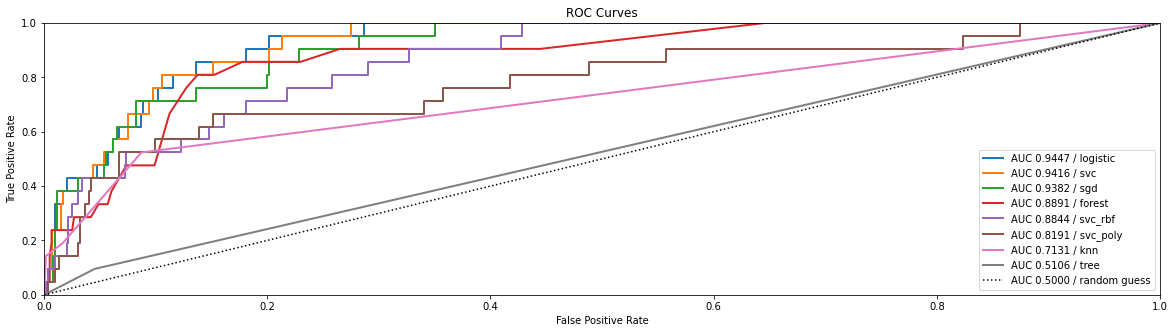

In [36]:
for auc, fpr, tpr, clf_name in sorted(zip(mean_auc, list_fpr, list_tpr, list_clf), reverse = True):
  plt.plot(fpr, tpr, linewidth = 2, label = f"AUC {auc:0.4f} / {clf_name}")
plt.plot([0,1], [0,1], 'k:', label = "AUC 0.5000 / random guess")
plt.xlim(0,1)
plt.ylim(0,1)
plt.title("ROC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [175]:
plt.plot(thresholds, precisions[:-1], 'b--', label = "Precision", linewidth = 2)
plt.plot(thresholds, recalls[:-1], "g--", label = "Recall", linewidth = 2)
plt.vlines(0, 0, 1.0, "k", "dotted", label = "Threshold")
plt.legend()
plt.show()

NameError: ignored

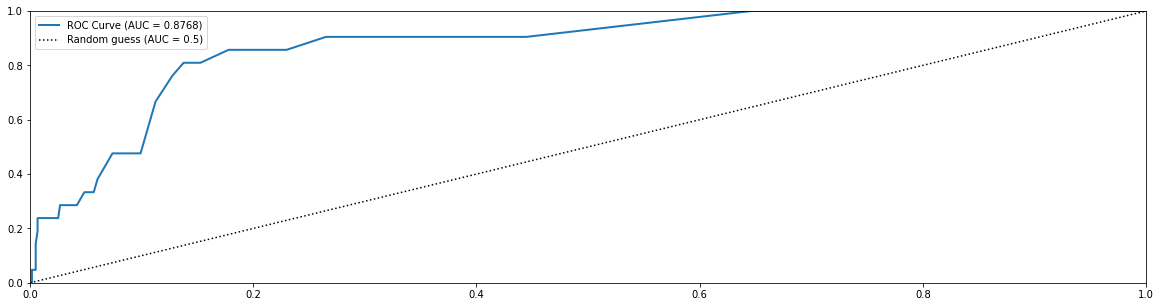

In [176]:

fpr, tpr, thresholds = roc_curve(y_train, y_scores)
plt.plot(fpr, tpr, linewidth = 2, label = f"ROC Curve (AUC = {roc_auc_score(y_train, y_scores):0.4f})")
plt.plot([0,1], [0,1], 'k:', label = "Random guess (AUC = 0.5)")
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend()
plt.show()

# Fine-tune hyperparameters of shortlisted models

In [165]:
season.iloc[[206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223
,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241
,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259
,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277
,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295
,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313
,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331
,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349
,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367
,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385
,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403
,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421
,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439
,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457
,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475
,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493
,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511
,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529
,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547
,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565
,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583
,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601
,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616], :]

,TEAM_ID,TEAM_NAME,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,CFID,CFPARAMS,OPP_FGM,OPP_FGA,OPP_FG_PCT,OPP_FG3M,OPP_FG3A,OPP_FG3_PCT,OPP_FTM,OPP_FTA,OPP_FT_PCT,OPP_OREB,OPP_DREB,OPP_REB,OPP_AST,OPP_TOV,OPP_STL,OPP_BLK,OPP_BLKA,OPP_PF,OPP_PFD,OPP_PTS,SEASON,UNIQUE_ID
206,1610612746,Los Angeles Clippers,82,37,45,0.451,53.0,38.7,84.2,0.459,3.1,8.8,0.345,23.4,30.1,0.778,13.0,32.5,45.4,25.1,17.1,7.9,5.6,5.2,24.0,0.0,103.8,-0.8,10,Los Angeles Clippers,38.8,87.5,0.444,6.4,17.4,0.368,20.6,27.0,0.762,13.0,29.8,42.8,22.9,14.8,8.4,5.2,5.6,25.6,24.0,104.6,2004-05,1610612746200405
207,1610612754,Indiana Pacers,82,44,38,0.537,54.2,36.3,83.9,0.432,7.4,21.4,0.344,23.8,30.0,0.792,11.8,32.9,44.7,20.3,16.0,8.4,4.9,5.4,25.7,0.1,103.7,0.8,10,Indiana Pacers,37.7,85.5,0.440,5.3,14.6,0.365,22.3,30.0,0.743,13.2,32.9,46.1,20.9,15.5,7.5,5.4,4.9,25.6,25.7,102.9,2004-05,1610612754200405
208,1610612745,Houston Rockets,82,51,31,0.622,53.2,38.1,86.0,0.443,7.4,20.4,0.364,20.8,26.6,0.781,11.7,34.8,46.5,23.2,15.2,7.5,5.1,4.5,24.2,0.0,104.4,4.4,10,Houston Rockets,36.4,86.0,0.423,6.1,18.0,0.338,21.0,28.3,0.742,11.9,32.7,44.7,22.7,14.6,8.1,4.5,5.1,23.7,24.2,100.0,2004-05,1610612745200405
209,1610612765,Detroit Pistons,82,54,28,0.659,54.2,38.7,87.2,0.444,4.9,14.3,0.345,21.6,29.2,0.739,14.3,34.0,48.4,24.3,15.4,7.8,6.7,5.0,22.2,0.0,103.9,4.3,10,Detroit Pistons,37.9,88.2,0.430,5.6,16.5,0.338,18.3,24.3,0.751,12.6,31.5,44.1,22.0,15.4,8.3,5.0,6.7,25.1,22.2,99.6,2004-05,1610612765200405
210,1610612742,Dallas Mavericks,82,58,24,0.707,50.9,39.5,86.3,0.457,6.0,16.4,0.364,23.6,29.9,0.789,12.8,32.6,45.4,20.8,14.2,9.1,5.9,5.1,23.6,0.0,108.5,6.1,10,Dallas Mavericks,38.0,86.6,0.438,5.8,17.6,0.330,20.7,27.4,0.754,13.8,31.8,45.7,22.1,16.5,7.5,5.1,5.9,24.5,23.6,102.4,2004-05,1610612742200405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,1610612742,Dallas Mavericks,82,52,30,0.634,50.2,40.9,88.7,0.461,13.6,38.9,0.350,17.0,22.1,0.771,9.6,35.2,44.8,24.4,13.0,7.0,4.1,3.8,20.5,20.9,112.5,3.4,10,Dallas Mavericks,40.6,88.9,0.457,11.4,33.5,0.340,16.5,21.5,0.767,9.9,35.6,45.5,24.5,13.6,7.3,3.8,4.1,20.9,20.5,109.1,2021-22,1610612742202122
613,1610612739,Cleveland Cavaliers,82,44,38,0.537,49.5,40.9,87.1,0.469,12.0,33.7,0.355,17.3,22.7,0.760,10.5,35.0,45.5,25.9,14.8,7.3,4.3,4.8,18.0,20.6,111.0,2.2,10,Cleveland Cavaliers,40.6,89.8,0.452,12.1,34.2,0.353,15.5,20.0,0.774,10.8,33.4,44.1,24.8,13.8,8.7,4.8,4.3,20.6,18.0,108.8,2021-22,1610612739202122
614,1610612741,Chicago Bulls,82,46,36,0.561,48.6,42.1,87.7,0.480,10.7,29.1,0.369,17.7,21.7,0.813,8.8,34.0,42.7,24.1,13.0,7.2,4.1,5.0,19.0,18.3,112.7,-0.4,10,Chicago Bulls,41.8,88.3,0.474,11.8,32.3,0.366,17.6,22.1,0.795,9.4,34.2,43.6,25.2,13.2,7.2,5.0,4.1,18.3,19.0,113.0,2021-22,1610612741202122
615,1610612766,Charlotte Hornets,82,43,39,0.524,47.8,42.2,90.1,0.468,13.7,37.6,0.365,15.6,21.1,0.740,10.7,33.2,43.9,27.7,13.1,8.5,4.8,4.5,19.6,19.3,113.6,0.4,10,Charlotte Hornets,41.4,88.8,0.466,13.8,38.1,0.362,16.6,21.8,0.763,11.2,35.1,46.3,26.1,14.8,7.4,4.5,4.8,19.3,19.6,113.2,2021-22,1610612766202122


In [162]:
full_pipeline = Pipeline([
    ("preparation", SeasonSimilarity(random_state=42)),
    ("logistic", LogisticRegression(random_state=42))
])

param_grid = [
    # {"preparation__columntransformer__num__quantiletransformer__output_distribution": ['uniform', 'normal']}
    {"logistic__random_state": [42,36]}
]

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(full_pipeline, param_grid, cv = 3, scoring = "accuracy", error_score = "raise")
grid_search.fit(season, y_train)

        TEAM_ID             TEAM_NAME  GP   W   L  W_PCT   MIN   FGM   FGA  \
206  1610612746  Los Angeles Clippers  82  37  45  0.451  53.0  38.7  84.2   
207  1610612754        Indiana Pacers  82  44  38  0.537  54.2  36.3  83.9   
208  1610612745       Houston Rockets  82  51  31  0.622  53.2  38.1  86.0   
209  1610612765       Detroit Pistons  82  54  28  0.659  54.2  38.7  87.2   
210  1610612742      Dallas Mavericks  82  58  24  0.707  50.9  39.5  86.3   

     FG_PCT  FG3M  FG3A  FG3_PCT   FTM   FTA  FT_PCT  OREB  DREB   REB   AST  \
206   0.459   3.1   8.8    0.345  23.4  30.1   0.778  13.0  32.5  45.4  25.1   
207   0.432   7.4  21.4    0.344  23.8  30.0   0.792  11.8  32.9  44.7  20.3   
208   0.443   7.4  20.4    0.364  20.8  26.6   0.781  11.7  34.8  46.5  23.2   
209   0.444   4.9  14.3    0.345  21.6  29.2   0.739  14.3  34.0  48.4  24.3   
210   0.457   6.0  16.4    0.364  23.6  29.9   0.789  12.8  32.6  45.4  20.8   

      TOV  STL  BLK  BLKA    PF  PFD    PTS  PLUS_

ValueError: ignored

In [40]:
abcd = full_pipeline.fit(season, season_label)
abcd.predict(season)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2593: UserWarning: n_quantiles (1000) is greater than the total number of samples (617). n_quantiles is set to n_samples.
  "n_samples." % (self.n_quantiles, n_samples)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2593: UserWarning: n_quantiles (1000) is greater than the total number of samples (26). n_quantiles is set to n_samples.
  "n_samples." % (self.n_quantiles, n_samples)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2593: UserWarning: n_quantiles (1000) is greater than the total number of samples (26). n_quantiles is set to n_samples.
  "n_samples." % (self.n_quantiles, n_samples)


array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [106]:
print(full_pipeline.get_params().keys())

dict_keys(['memory', 'steps', 'verbose', 'preparation', 'logistic', 'preparation__memory', 'preparation__steps', 'preparation__verbose', 'preparation__newcolumn', 'preparation__columntransformer', 'preparation__pca', 'preparation__columntransformer__n_jobs', 'preparation__columntransformer__remainder', 'preparation__columntransformer__sparse_threshold', 'preparation__columntransformer__transformer_weights', 'preparation__columntransformer__transformers', 'preparation__columntransformer__verbose', 'preparation__columntransformer__verbose_feature_names_out', 'preparation__columntransformer__num', 'preparation__columntransformer__era', 'preparation__columntransformer__num__memory', 'preparation__columntransformer__num__steps', 'preparation__columntransformer__num__verbose', 'preparation__columntransformer__num__fixpf', 'preparation__columntransformer__num__dropcols', 'preparation__columntransformer__num__quantiletransformer', 'preparation__columntransformer__num__fixpf__col_drop', 'prepar

# Try

In [64]:
import pandas as pd
X = pd.DataFrame(
    {'city': ['London', 'London', 'Paris', 'Sallisaw'],
     'title': ["His Last Bow", "How Watson Learned the Trick",
               "A Moveable Feast", "The Grapes of Wrath"],
     'expert_rating': [5, 3, 4, 5],
     'user_rating': [4, 5, 4, 3]})

In [65]:
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder
column_trans = ColumnTransformer(
    [('categories', OneHotEncoder(dtype='int'), ['city']),
     ('title_bow', CountVectorizer(), 'title')],
    remainder='drop', verbose_feature_names_out=False)

column_trans.fit_transform(X)

<4x16 sparse matrix of type '<class 'numpy.int64'>'
	with 18 stored elements in Compressed Sparse Row format>

In [74]:
from sklearn.preprocessing import MinMaxScaler
try_pipeline = Pipeline([
    ("preparation", MinMaxScaler()),
    ("logistic", LogisticRegression(random_state=42))
])

try_pipeline.fit(X.iloc[:,2:].values, X.iloc[:,-1].values)

Pipeline(steps=[('preparation', MinMaxScaler()),
                ('logistic', LogisticRegression(random_state=42))])

In [76]:
param_grid = [
    # {"preparation__columntransformer__num__quantiletransformer__output_distribution": ['uniform', 'normal']}
    {"logistic__random_state": [42,36]}
]

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(try_pipeline, param_grid, cv = 2, scoring = "accuracy", error_score = "raise")
grid_search.fit(X.iloc[:,2:].values, X.iloc[:,-1].values)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  UserWarning,


GridSearchCV(cv=2, error_score='raise',
             estimator=Pipeline(steps=[('preparation', MinMaxScaler()),
                                       ('logistic',
                                        LogisticRegression(random_state=42))]),
             param_grid=[{'logistic__random_state': [42, 36]}],
             scoring='accuracy')

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector
ct = ColumnTransformer([
      ('scale', StandardScaler(),
      make_column_selector(dtype_include=np.number)),
      ('onehot',
      OneHotEncoder(),
      make_column_selector(pattern='city', dtype_include=object))])
ct.fit_transform(X)

# Test set evaluation
- lift and gain chart

# Ordinal logisitic regression 
- multiple binary classification, instead of softmax
- 1 for ranking > 1, 1 for ranking > 2, ...
- rank consistency: if 1 for ranking > 1 and 1 for ranking > 4, then it must have 1 for > 2 and > 3
- from mord import LogisticAT
- https://medium.datadriveninvestor.com/logistic-regression-simple-multinomial-and-ordinal-b2bc886bb974 